In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('C:/python/OilGas/OilCrude.csv',sep=';',decimal=',')
df.describe(include='all')

,Crude (million tonnes),Canada,Mexico,US,S. & Cent. America,Europe,Russia,Other CIS,Middle East,Africa,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
count,21,21.000000,21.000000,21.00000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,East & S. Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.384962,0.006829,18.39319,1.284076,24.721438,0.024429,0.883905,1.943033,1.388857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.184214,0.031292,41.24958,2.399986,37.432552,0.108936,4.029644,3.454715,3.109496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.00000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,2.95290,0.140600,5.837900,0.000000,0.000000,0.176200,0.046100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.474900,0.000000,16.77000,0.817000,41.267900,0.000000,0.000000,1.535500,0.368800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns[:16]

Index(['Crude (million tonnes)', 'Canada', 'Mexico', 'US',
       'S. & Cent. America', 'Europe', 'Russia', 'Other CIS', 'Middle East',
       'Africa', 'Australasia', 'China', 'India', 'Japan', 'Singapore',
       'Other Asia Pacific'],
      dtype='object')

In [6]:
m1=np.array(df[df.columns[1:]].fillna(0))
m2=np.sum(m1,axis=0)
m3=np.sum(m1,axis=1)
K=1
T=np.sum(m2)
X1=m1/T*np.nan_to_num(np.log2(m1*T/m3.reshape(-1,1)/m2.reshape(1,-1)))
Psi1=-m1/T*np.nan_to_num(np.log2(m1**2/m3.reshape(-1,1)/m2.reshape(1,-1)))
X1

array([[-0.        , -0.        ,  0.20295292, ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        ,  0.02419555, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03306171,  0.00029157, -0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.00161596, ...,  0.        ,
         0.        ,  0.        ]])

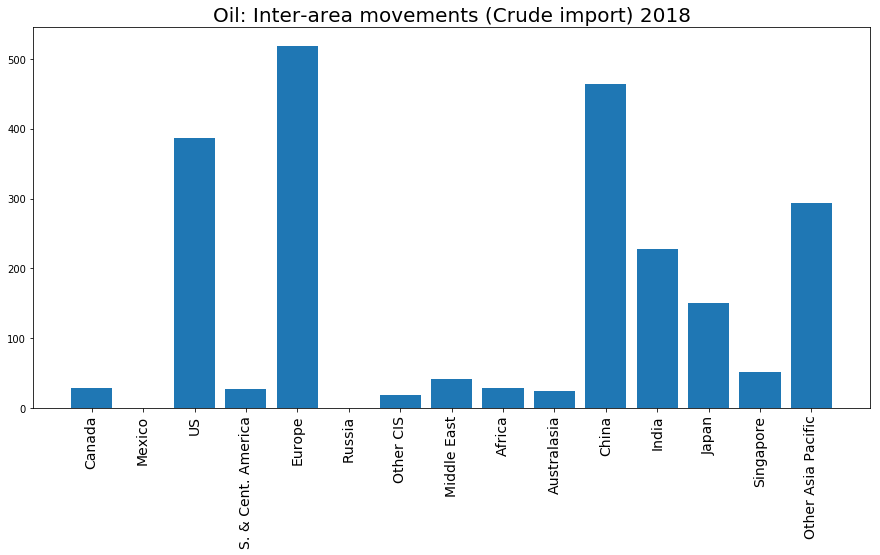

In [65]:
plt.figure(figsize=(15,7))
plt.bar(range(15),m2[:15])
plt.title('Oil: Inter-area movements (Crude import) 2018',fontsize=20)
plt.xticks(range(15),df.columns[1:16],rotation='vertical',fontsize=14)
plt.show()

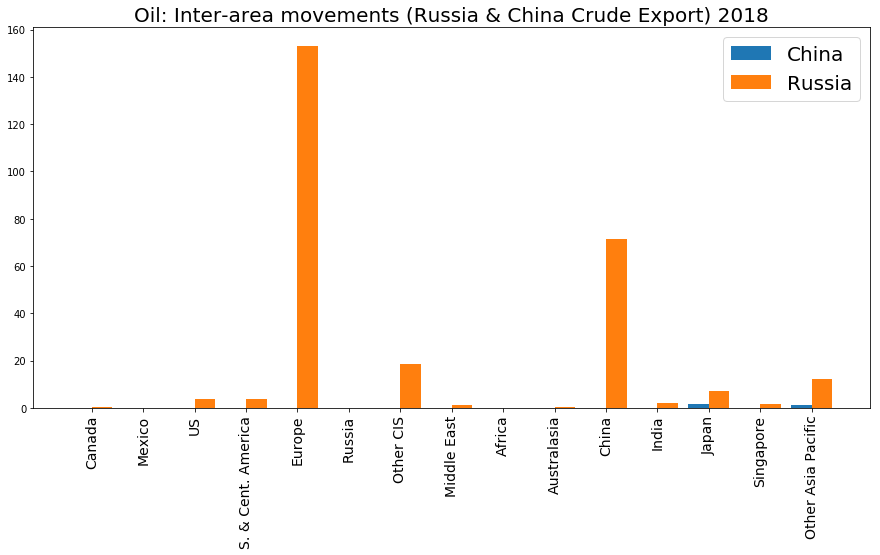

In [66]:
plt.figure(figsize=(15,7))
plt.bar(np.arange(15)-0.2,np.array(df[df[df.columns[0]]=='China'])[0][1:16],width=0.4)
plt.bar(np.arange(15)+0.2,np.array(df[df[df.columns[0]]=='Russia'])[0][1:16],width=0.4)
plt.title('Oil: Inter-area movements (Russia & China Crude Export) 2018',fontsize=20)
plt.xticks(range(15),df.columns[1:16],rotation='vertical',fontsize=14)
plt.legend(['China','Russia'],fontsize=20)
plt.show()

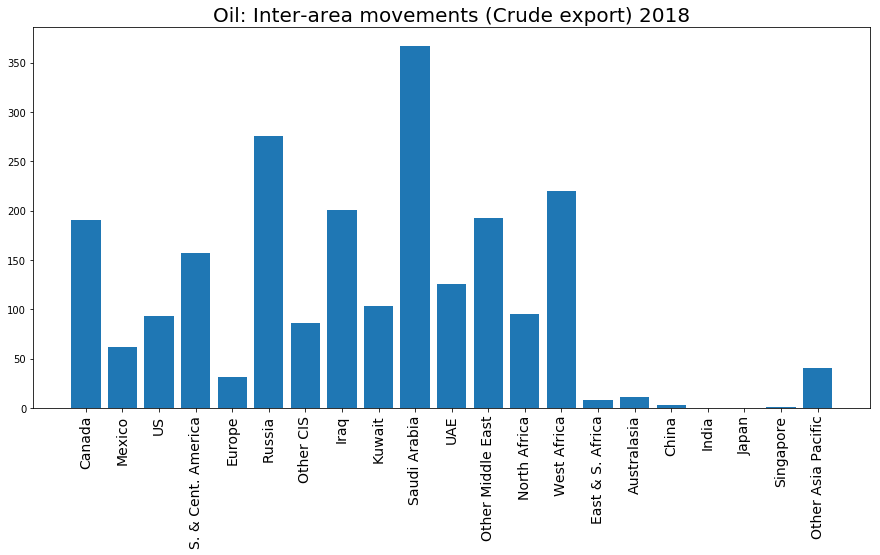

In [67]:
plt.figure(figsize=(15,7))
plt.bar(range(len(df)),m3)
plt.title('Oil: Inter-area movements (Crude export) 2018',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
plt.show()

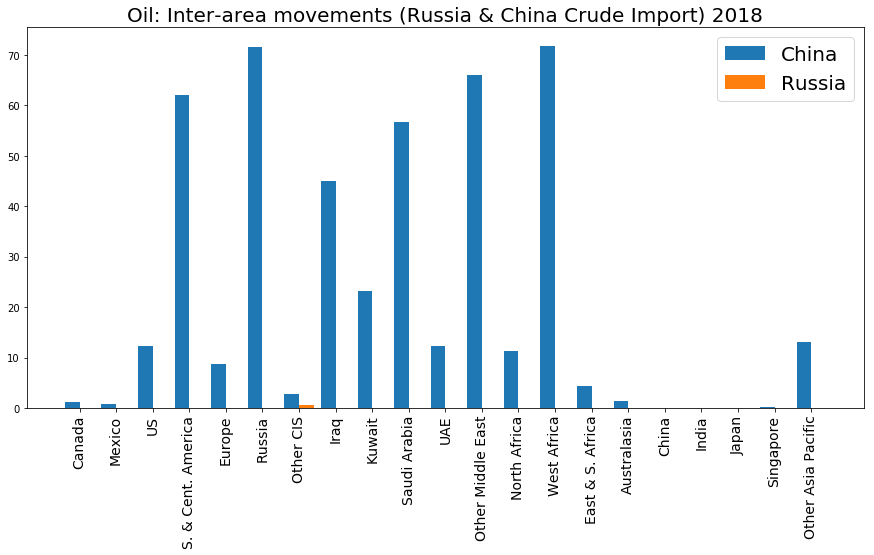

In [68]:
plt.figure(figsize=(15,7))
plt.bar(np.arange(len(df))-0.2,df['China'],width=0.4)
plt.bar(np.arange(len(df))+0.2,df['Russia'],width=0.4)
plt.title('Oil: Inter-area movements (Russia & China Crude Import) 2018',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
plt.legend(['China','Russia'],fontsize=20)
plt.show()

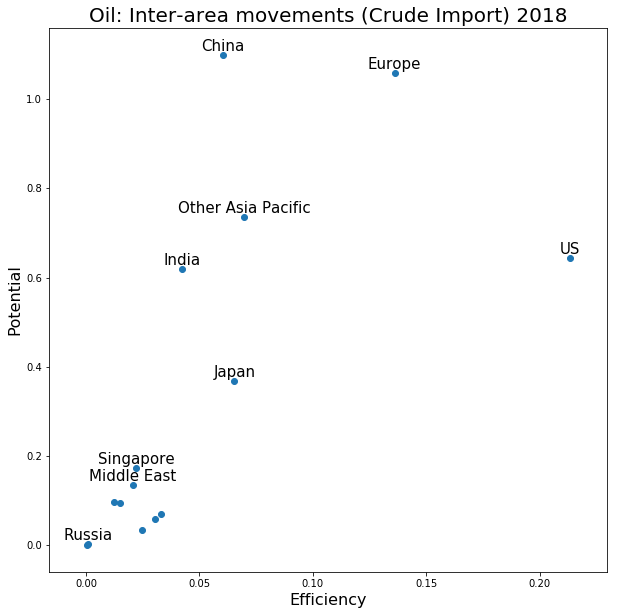

In [69]:
xx=np.sum(X1,axis=0)[:15]
pp=np.sum(Psi1,axis=0)[:15]
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Oil: Inter-area movements (Crude Import) 2018',fontsize=20)
for num,el in enumerate(df.columns[1:16]):
    if (xx[num]>0.05) | (pp[num]>0.1):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=15, horizontalalignment='center')
plt.text(xx[5],pp[5]+0.01,'Russia',fontsize=15, horizontalalignment='center')
plt.show()


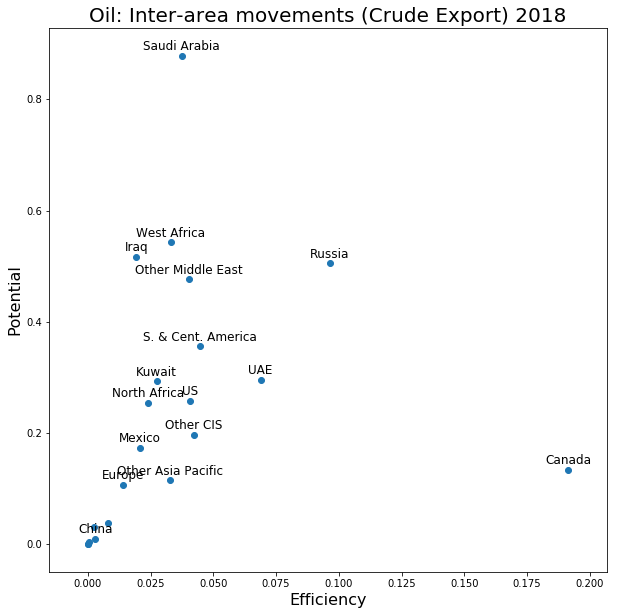

In [70]:
xx=np.sum(X1,axis=1)
pp=np.sum(Psi1,axis=1)
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Oil: Inter-area movements (Crude Export) 2018',fontsize=20)
for num,el in enumerate(df[df.columns[0]]):
    if (xx[num]>0.05) | (pp[num]>0.1):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=12, horizontalalignment='center')
plt.text(xx[16],pp[16]+0.01,'China',fontsize=12, horizontalalignment='center')
plt.show()


In [71]:
df=pd.read_csv('C:/python/OilGas/OilProducts.csv',sep=';',decimal=',')
df.describe(include='all')

,Product (million tonnes),Canada,Mexico,US,S. & Cent. America,Europe,Russia,Other CIS,Middle East,Africa,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
count,21,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,East & S. Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.764081,3.064495,4.947633,5.091276,10.702276,0.446833,0.480433,2.824605,4.839795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.135273,12.552935,7.754378,17.471094,24.352747,1.909377,1.948206,4.143043,9.628984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.009200,0.000000,0.803300,0.233900,0.915300,0.000200,0.000000,0.110300,0.286400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.099200,0.004600,1.459600,0.611400,2.820000,0.004600,0.001400,1.287800,2.177600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.235800,0.405600,5.281100,1.371700,9.615700,0.028300,0.010700,3.658100,6.050500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
m1=np.array(df[df.columns[1:]].fillna(0))
m2=np.sum(m1,axis=0)
m3=np.sum(m1,axis=1)
K=1
T=np.sum(m2)
X1=m1/T*np.nan_to_num(np.log2(m1*T/m3.reshape(-1,1)/m2.reshape(1,-1)))
Psi1=-m1/T*np.nan_to_num(np.log2(m1**2/m3.reshape(-1,1)/m2.reshape(1,-1)))
X1

array([[-0.00000000e+00, -2.77120342e-04,  7.45646821e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.44018230e-05, -0.00000000e+00,  4.95255167e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.23021116e-02,  1.00059964e-01, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.93063363e-04, -3.92095713e-04, -4.67465806e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.40506136e-04, -8.17153275e-04, -2.58727028e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.68192382e-04, -1.22606872e-03, -3.12507977e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

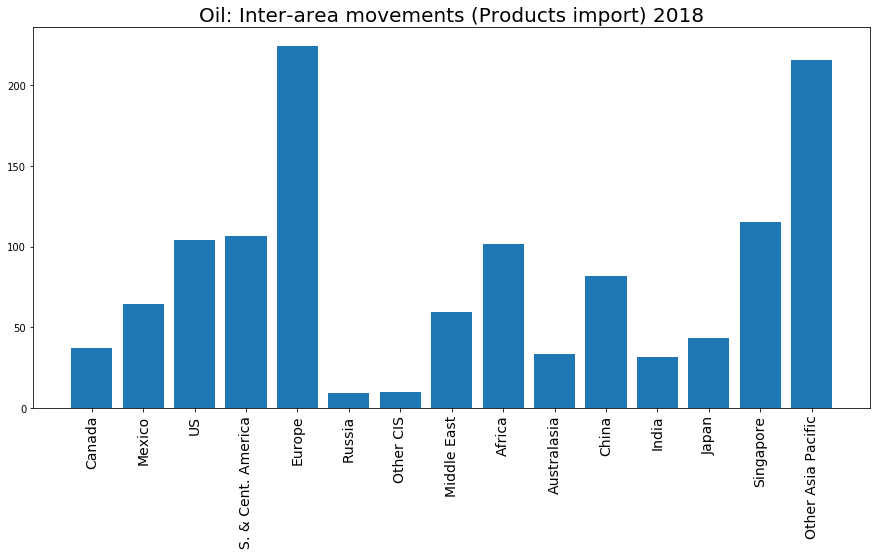

In [73]:
plt.figure(figsize=(15,7))
plt.bar(range(15),m2[:15])
plt.title('Oil: Inter-area movements (Products import) 2018',fontsize=20)
plt.xticks(range(15),df.columns[1:16],rotation='vertical',fontsize=14)
plt.show()

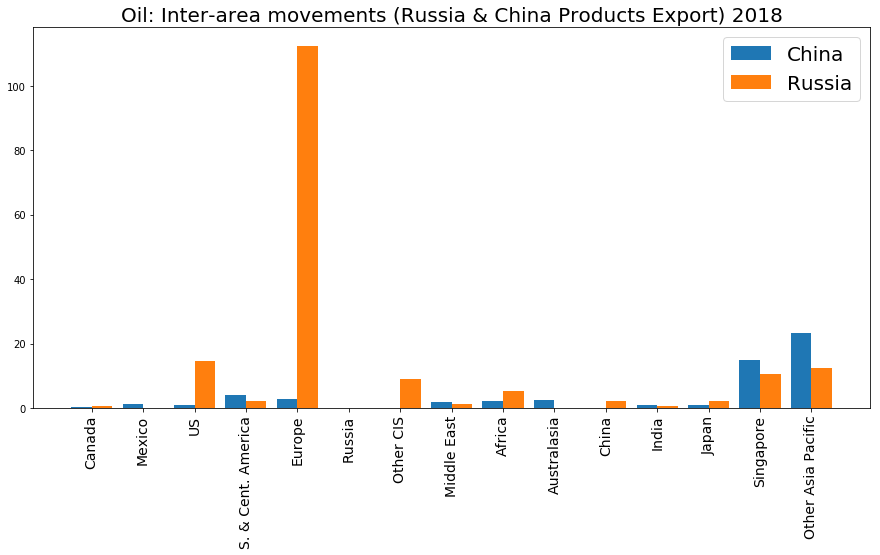

In [74]:
plt.figure(figsize=(15,7))
plt.bar(np.arange(15)-0.2,np.array(df[df[df.columns[0]]=='China'])[0][1:16],width=0.4)
plt.bar(np.arange(15)+0.2,np.array(df[df[df.columns[0]]=='Russia'])[0][1:16],width=0.4)
plt.title('Oil: Inter-area movements (Russia & China Products Export) 2018',fontsize=20)
plt.xticks(range(15),df.columns[1:16],rotation='vertical',fontsize=14)
plt.legend(['China','Russia'],fontsize=20)
plt.show()

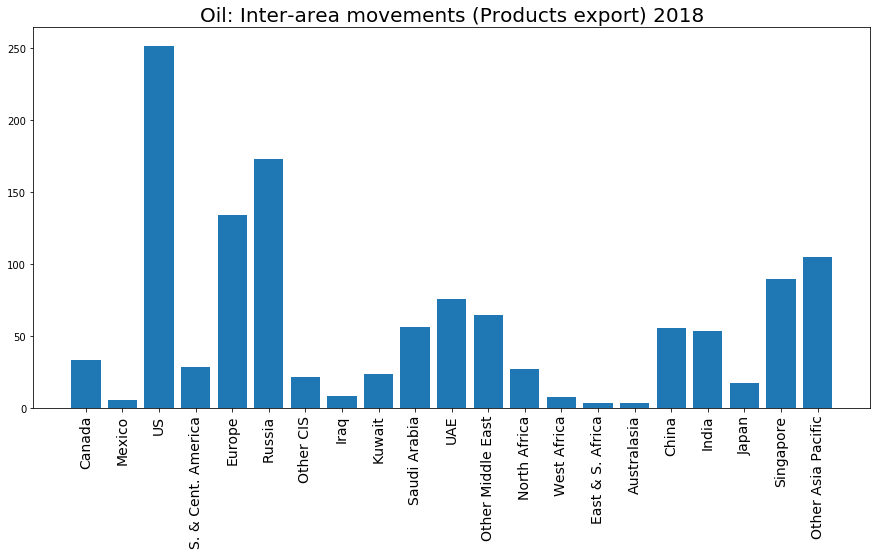

In [75]:
plt.figure(figsize=(15,7))
plt.bar(range(len(df)),m3)
plt.title('Oil: Inter-area movements (Products export) 2018',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
plt.show()

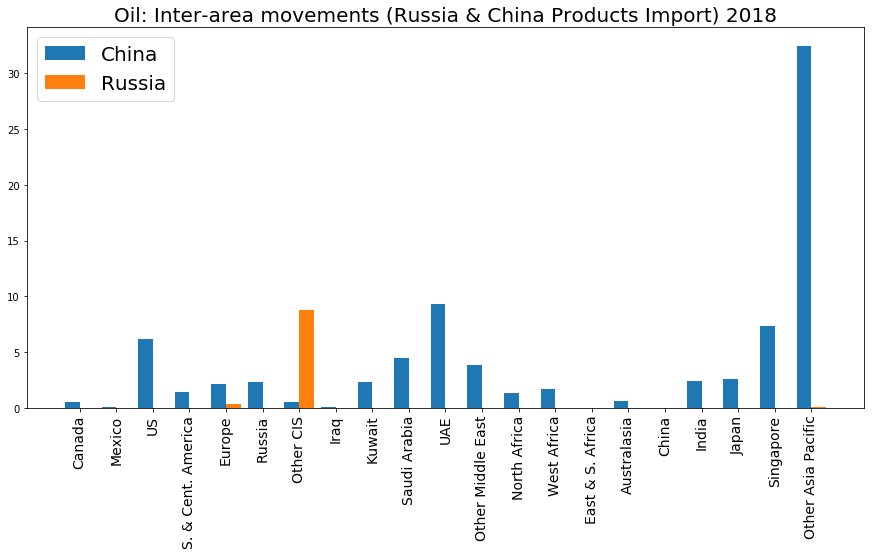

In [76]:
plt.figure(figsize=(15,7))
plt.bar(np.arange(len(df))-0.2,df['China'],width=0.4)
plt.bar(np.arange(len(df))+0.2,df['Russia'],width=0.4)
plt.title('Oil: Inter-area movements (Russia & China Products Import) 2018',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
plt.legend(['China','Russia'],fontsize=20)
plt.show()

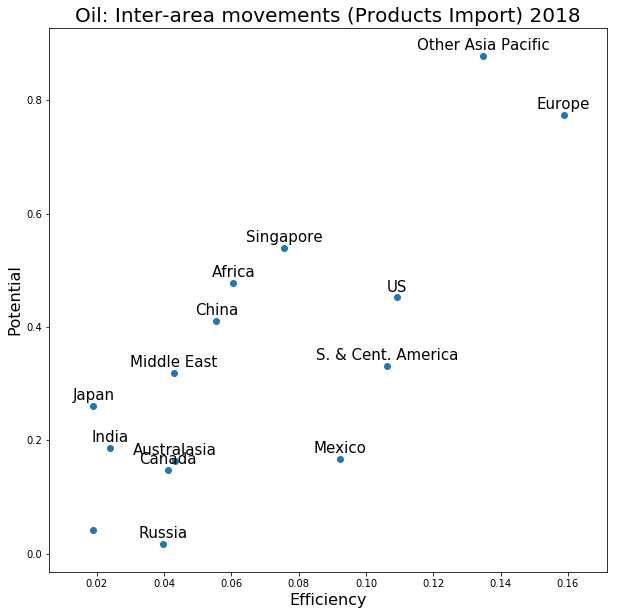

In [77]:
xx=np.sum(X1,axis=0)[:15]
pp=np.sum(Psi1,axis=0)[:15]
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Oil: Inter-area movements (Products Import) 2018',fontsize=20)
for num,el in enumerate(df.columns[1:16]):
    if (xx[num]>0.05) | (pp[num]>0.1):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=15, horizontalalignment='center')
plt.text(xx[5],pp[5]+0.01,'Russia',fontsize=15, horizontalalignment='center')
plt.show()


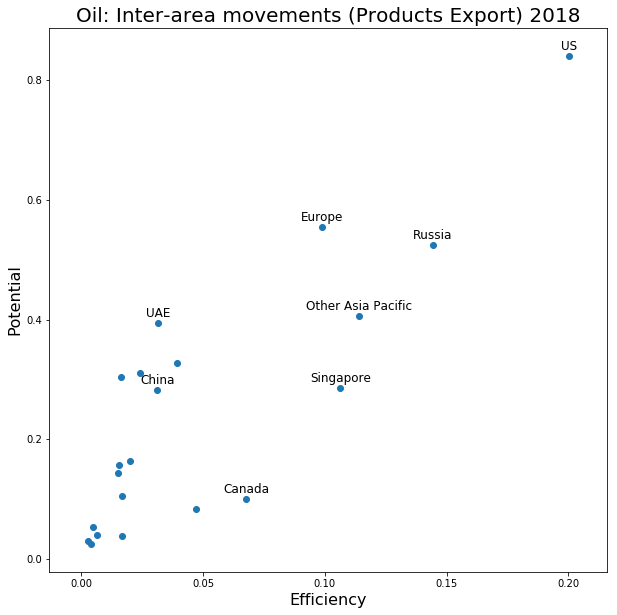

In [80]:
xx=np.sum(X1,axis=1)
pp=np.sum(Psi1,axis=1)
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Oil: Inter-area movements (Products Export) 2018',fontsize=20)
for num,el in enumerate(df[df.columns[0]]):
    if (xx[num]>0.05) | (pp[num]>0.35):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=12, horizontalalignment='center')
plt.text(xx[16],pp[16]+0.01,'China',fontsize=12, horizontalalignment='center')
plt.show()


In [81]:
df=pd.read_csv('C:/python/OilGas/GASLNG.csv',sep=';',decimal=',')
df.describe(include='all')

,To,US,Peru,Trinidad & Tobago,Other Americas*,Norway,Other Europe*,Russia,Oman,Qatar,...,Angola,Egypt,Nigeria,Other Africa,Australia,Brunei,Indonesia,Malaysia,Papua New Guinea,Other Asia Pacific*
count,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
unique,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.980255,0.164293,0.578421,0.004269,0.228986,0.172766,0.859893,0.467824,3.615421,...,0.178052,0.069817,0.959683,0.185838,3.166193,0.302100,0.717528,1.137876,0.327890,0.021290
std,NaN,1.549325,0.411037,0.814505,0.015939,0.456531,0.240861,1.861103,1.312316,5.167841,...,0.422874,0.115461,1.260937,0.378279,9.276492,1.071083,1.927200,3.234964,1.013563,0.057345
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.097400,0.000000,0.082900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.420200,0.000000,0.273700,0.000000,0.087700,0.058300,0.093600,0.000000,1.461500,...,0.000000,0.000000,0.355100,0.077700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,1.073400,0.081800,0.593700,0.000000,0.177400,0.264100,0.878400,0.099900,3.391800,...,0.093000,0.174700,1.432000,0.101800,0.199300,0.000000,0.178000,0.000000,0.000000,0.000000


In [82]:
m1=np.array(df[df.columns[1:]].fillna(0))
m2=np.sum(m1,axis=0)
m3=np.sum(m1,axis=1)
K=1
T=np.sum(m2)
X1=m1/T*np.nan_to_num(np.log2(m1*T/m3.reshape(-1,1)/m2.reshape(1,-1)))
Psi1=-m1/T*np.nan_to_num(np.log2(m1**2/m3.reshape(-1,1)/m2.reshape(1,-1)))
X1

array([[-7.39117077e-06, -0.00000000e+00,  4.18488430e-03,
        -0.00000000e+00,  5.87964880e-04,  4.35939596e-06,
         3.52118966e-04, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [ 3.90092927e-02,  5.76527716e-05,  2.07740740e-05,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  5.61419567e-03,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -3.68971410e-04, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  1.87656367e-02,
         8.00003323e-04, -0.00000000e+00,  1.06760376e-03,
    

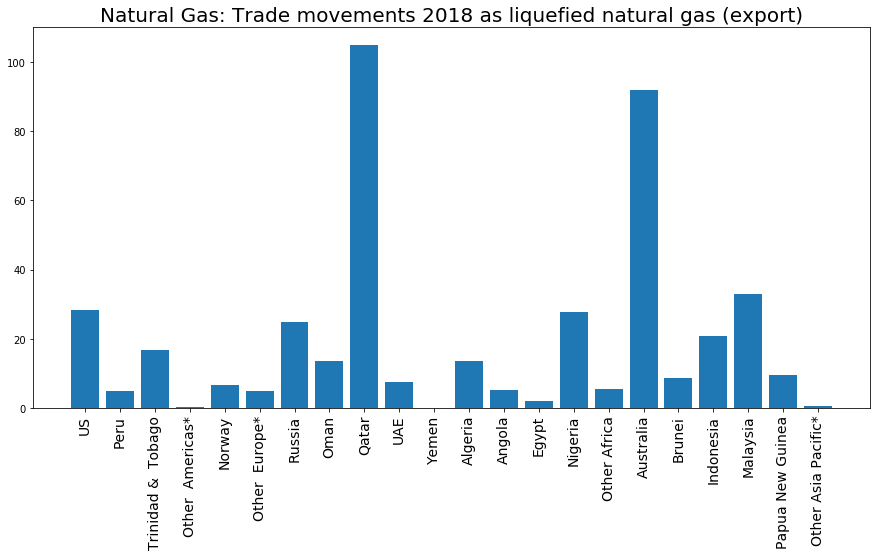

In [84]:
plt.figure(figsize=(15,7))
plt.bar(range(len(df.columns)-1),m2)
plt.title('Natural Gas: Trade movements 2018 as liquefied natural gas (export)',fontsize=20)
plt.xticks(range(len(df.columns)-1),df.columns[1:],rotation='vertical',fontsize=14)
plt.show()

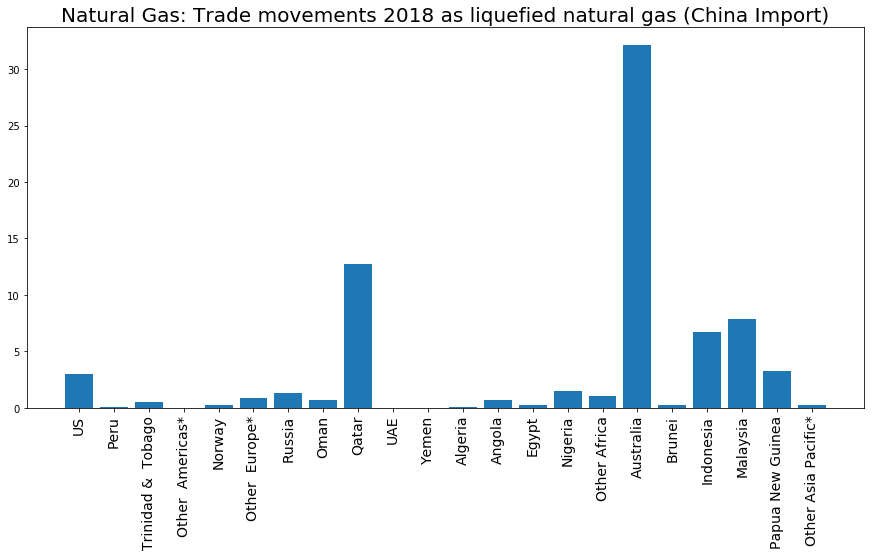

In [90]:
plt.figure(figsize=(15,7))
plt.bar(np.arange(len(df.columns)-1),np.array(df[df[df.columns[0]]=='China'])[0][1:])
#plt.bar(np.arange(len(df.columns)-1)+0.2,np.array(df[df[df.columns[0]]=='Russia'])[0][1:],width=0.4)
plt.title('Natural Gas: Trade movements 2018 as liquefied natural gas (China Import)',fontsize=20)
plt.xticks(range(len(df.columns)-1),df.columns[1:],rotation='vertical',fontsize=14)
#plt.legend(['China','Russia'],fontsize=20)
plt.show()

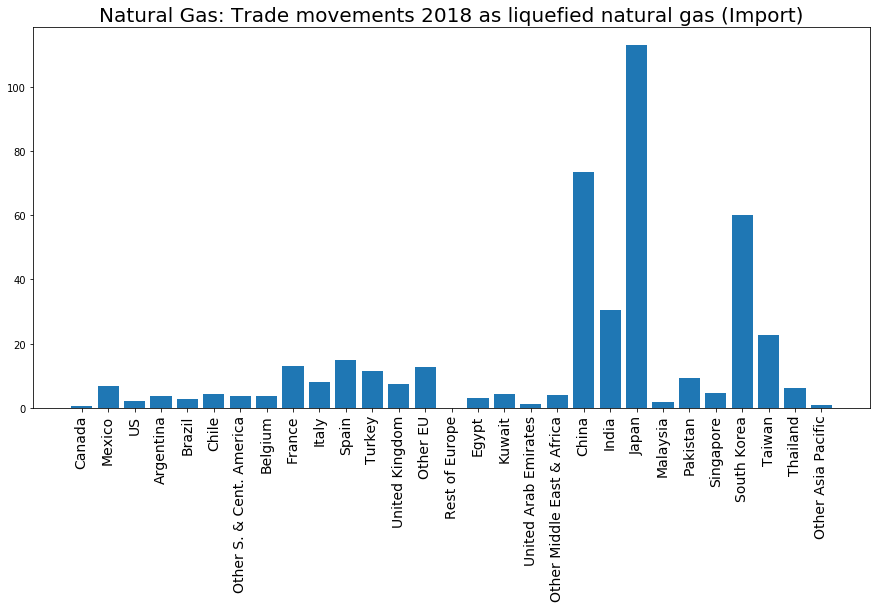

In [91]:
plt.figure(figsize=(15,7))
plt.bar(range(len(df)),m3)
plt.title('Natural Gas: Trade movements 2018 as liquefied natural gas (Import)',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
plt.show()

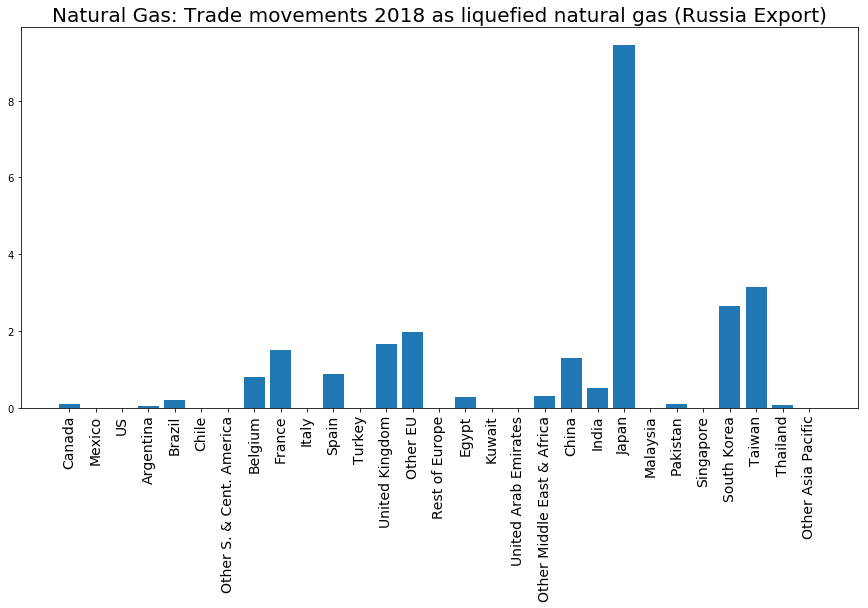

In [92]:
plt.figure(figsize=(15,7))
#plt.bar(np.arange(len(df))-0.2,df['China'],width=0.4)
plt.bar(np.arange(len(df)),df['Russia'])
plt.title('Natural Gas: Trade movements 2018 as liquefied natural gas (Russia Export)',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
#plt.legend(['China','Russia'],fontsize=20)
plt.show()

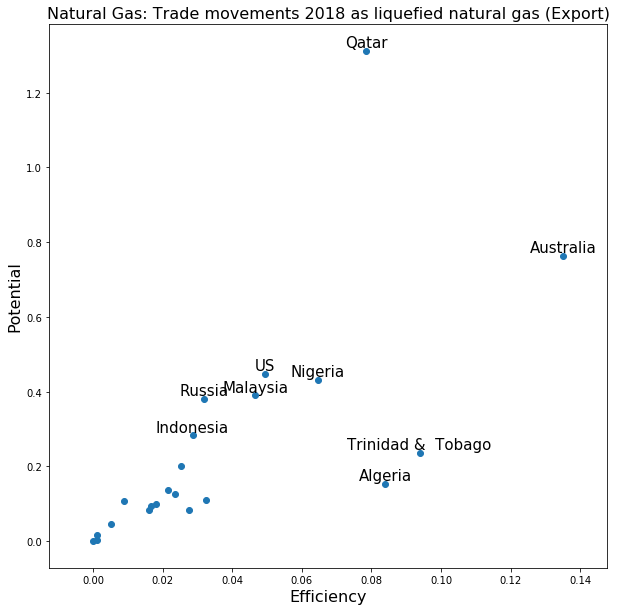

In [94]:
xx=np.sum(X1,axis=0)
pp=np.sum(Psi1,axis=0)
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Natural Gas: Trade movements 2018 as liquefied natural gas (Export)',fontsize=16)
for num,el in enumerate(df.columns[1:]):
    if (xx[num]>0.05) | (pp[num]>0.2):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=15, horizontalalignment='center')
#plt.text(xx[5],pp[5]+0.01,'Russia',fontsize=15, horizontalalignment='center')
plt.show()


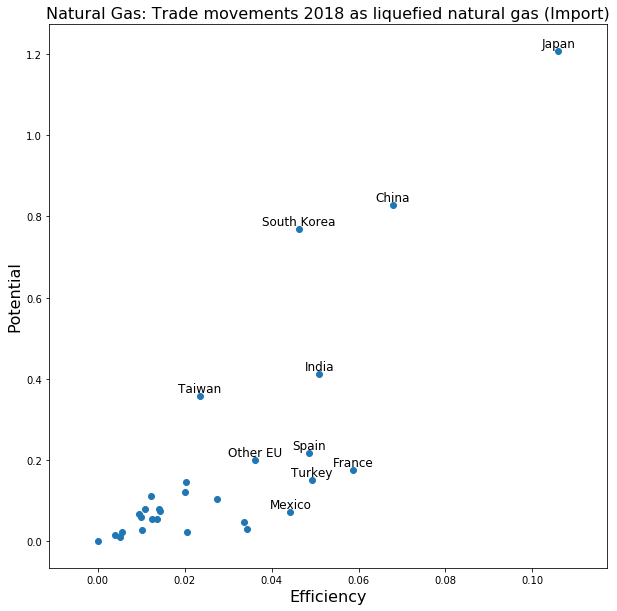

In [97]:
xx=np.sum(X1,axis=1)
pp=np.sum(Psi1,axis=1)
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Natural Gas: Trade movements 2018 as liquefied natural gas (Import)',fontsize=16)
for num,el in enumerate(df[df.columns[0]]):
    if (xx[num]>0.04) | (pp[num]>0.2):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=12, horizontalalignment='center')
#plt.text(xx[16],pp[16]+0.01,'China',fontsize=12, horizontalalignment='center')
plt.show()


In [100]:
df=pd.read_csv('C:/python/OilGas/GasPipline.csv',sep=';',decimal=',')
m1=np.array(df[df.columns[1:]].fillna(0))
m2=np.sum(m1,axis=0)
m3=np.sum(m1,axis=1)
K=1
T=np.sum(m2)
X1=m1/T*np.nan_to_num(np.log2(m1*T/m3.reshape(-1,1)/m2.reshape(1,-1)))
Psi1=-m1/T*np.nan_to_num(np.log2(m1**2/m3.reshape(-1,1)/m2.reshape(1,-1)))


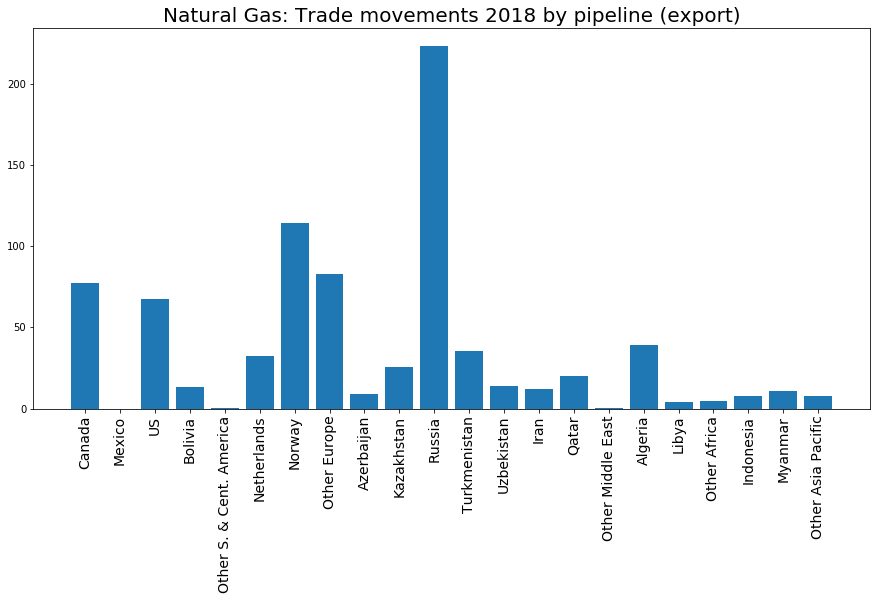

In [101]:
plt.figure(figsize=(15,7))
plt.bar(range(len(df.columns)-1),m2)
plt.title('Natural Gas: Trade movements 2018 by pipeline (export)',fontsize=20)
plt.xticks(range(len(df.columns)-1),df.columns[1:],rotation='vertical',fontsize=14)
plt.show()

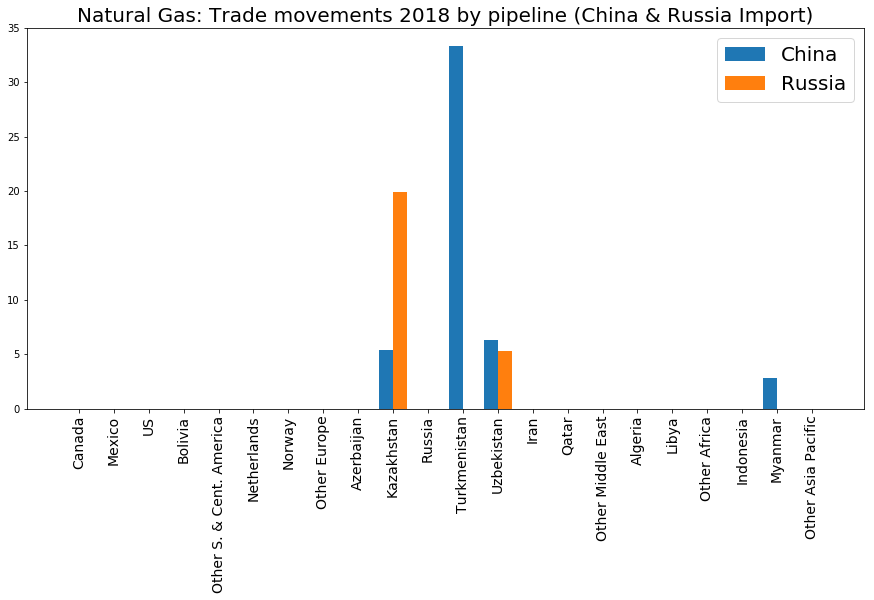

In [114]:
plt.figure(figsize=(15,7))
plt.bar(np.arange(len(df.columns)-1)-0.2,np.array(df[df[df.columns[0]]=='China'])[0][1:],width=0.4)
plt.bar(np.arange(len(df.columns)-1)+0.2,np.array(df[df[df.columns[0]]=='Russia'])[0][1:],width=0.4)
plt.title('Natural Gas: Trade movements 2018 by pipeline (China & Russia Import)',fontsize=20)
plt.xticks(range(len(df.columns)-1),df.columns[1:],rotation='vertical',fontsize=14)
plt.legend(['China','Russia'],fontsize=20)
plt.show()

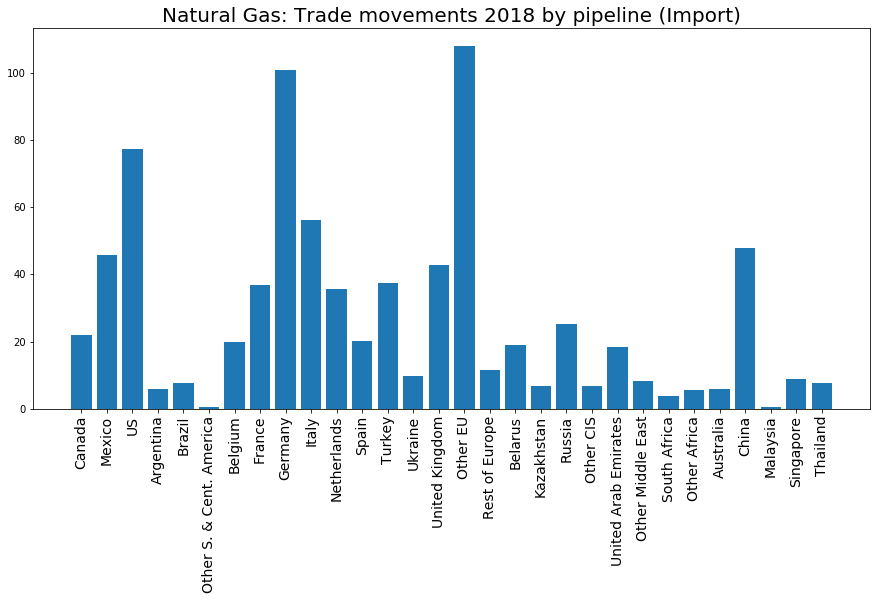

In [115]:
plt.figure(figsize=(15,7))
plt.bar(range(len(df)),m3)
plt.title('Natural Gas: Trade movements 2018 by pipeline (Import)',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
plt.show()

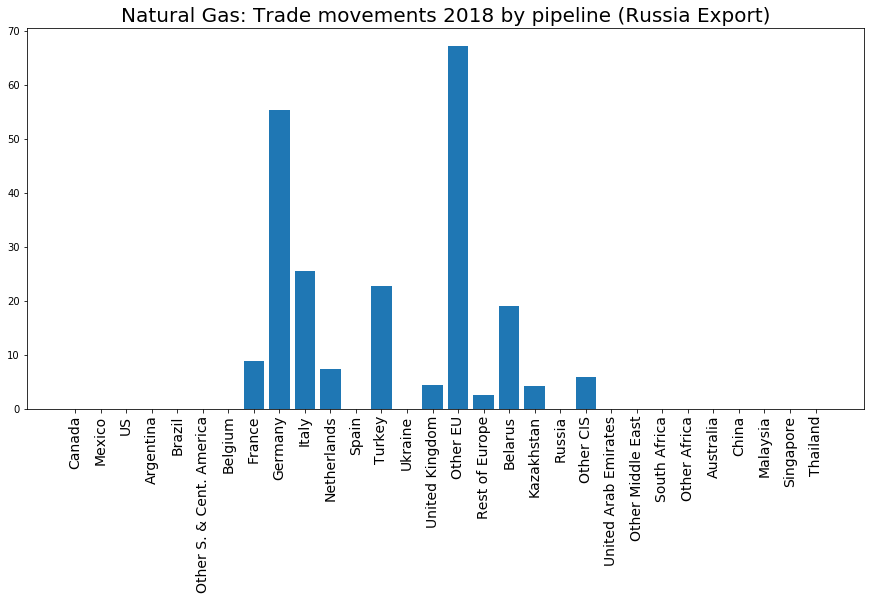

In [107]:
plt.figure(figsize=(15,7))
#plt.bar(np.arange(len(df))-0.2,df['China'],width=0.4)
plt.bar(np.arange(len(df)),df['Russia'])
plt.title('Natural Gas: Trade movements 2018 by pipeline (Russia Export)',fontsize=20)
plt.xticks(range(len(df)),df[df.columns[0]],rotation='vertical',fontsize=14)
#plt.legend(['China','Russia'],fontsize=20)
plt.show()

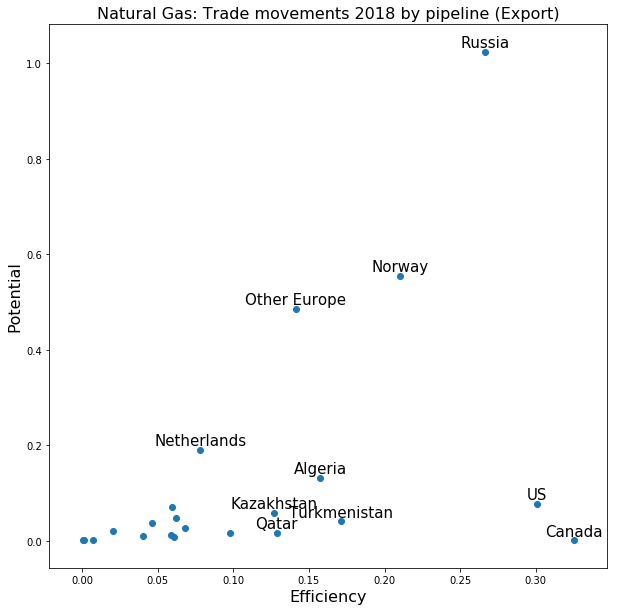

In [109]:
xx=np.sum(X1,axis=0)
pp=np.sum(Psi1,axis=0)
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Natural Gas: Trade movements 2018 by pipeline (Export)',fontsize=16)
for num,el in enumerate(df.columns[1:]):
    if (xx[num]>0.1) | (pp[num]>0.1):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=15, horizontalalignment='center')
#plt.text(xx[5],pp[5]+0.01,'Russia',fontsize=15, horizontalalignment='center')
plt.show()


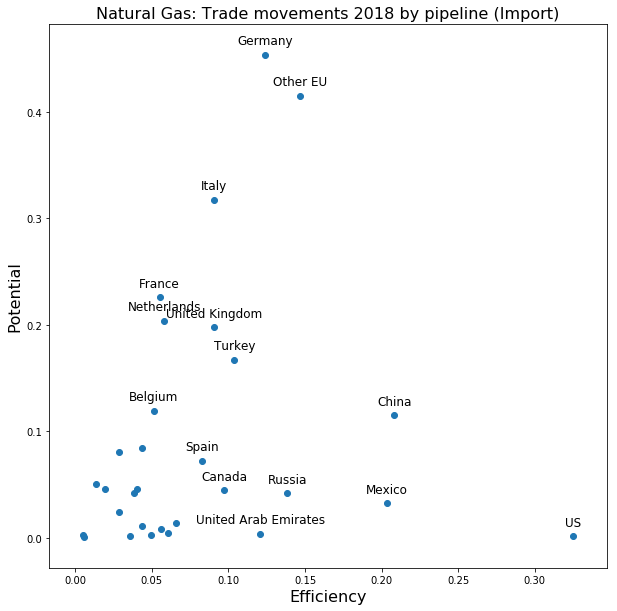

In [113]:
xx=np.sum(X1,axis=1)
pp=np.sum(Psi1,axis=1)
plt.figure(figsize=(10,10))
plt.scatter(xx,pp)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Natural Gas: Trade movements 2018 by pipeline (Import)',fontsize=16)
for num,el in enumerate(df[df.columns[0]]):
    if (xx[num]>0.08) | (pp[num]>0.1):
        plt.text(xx[num],pp[num]+0.01,el,fontsize=12, horizontalalignment='center')
#plt.text(xx[16],pp[16]+0.01,'China',fontsize=12, horizontalalignment='center')
plt.show()
